In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

Reading in the data. I've only used numpy arrays in the past so I'll use panda array for this project. The data comes with no column names so I set them here.

In [11]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['s_l', 's_w', 'p_l', 'p_w', 'class']

df.head()

Getting a general idea of what the data looks like. We have a 150x5 dataframe.

In [14]:
df.describe()

,s_l,s_w,p_l,p_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This is a really cool function that I just found out about. query() allows you to give a logical statement and will return rows that fulfill the statement. If no rows follow this statement then no rows are returned.

In [21]:
df.query('p_l < s_l')
df.query('s_l > s_w')

,s_l,s_w,p_l,p_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


I brought in seaborn because 1 it looks nicer, but two because there is a easy, good-looking pairsplot function. pandas does have 1 too (pd.plotting.scatter_matrix(df)) but it takes some tuning to get it looking nice. Looking at the plot there is definitely some nice groupings among parameters.

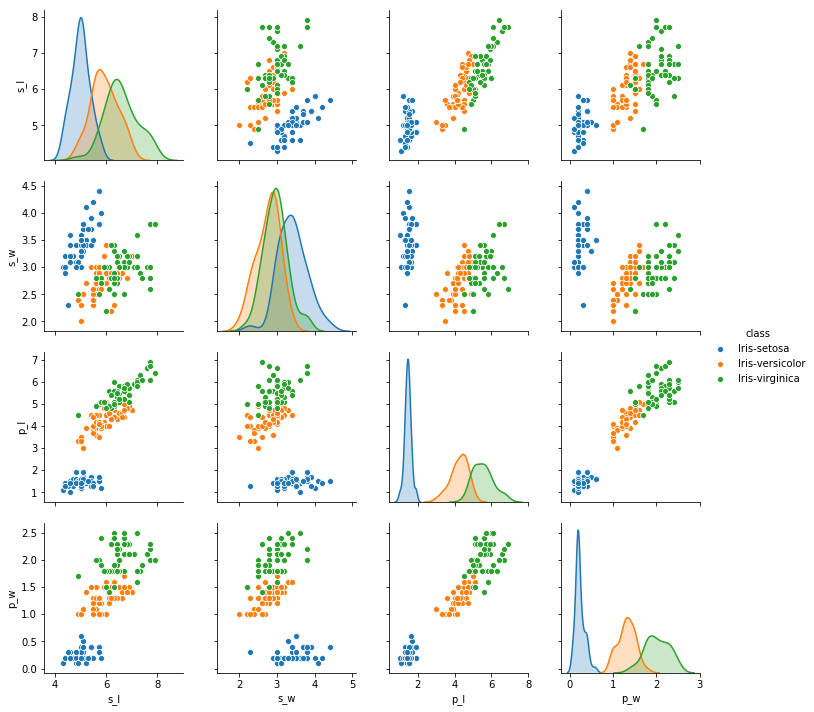

In [32]:
sns.pairplot(df, hue='class')

Let's zoom in on the graphs that I think might be more interesting.

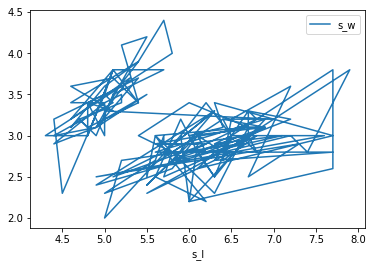

In [43]:
df.plot('s_l', 's_w')

In [53]:
plt.scatter(df[:,0], df[:,1])

TypeError: unhashable type: 'slice'